In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from ast import increment_lineno
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("/content/drive/MyDrive/defmlcore/AAPL 2.0.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-12,148.429993,150.399994,147.479996,149.990005,149.124527,63804000
1,2021-11-15,150.369995,151.880005,149.429993,150.000000,149.134460,59222800
2,2021-11-16,149.940002,151.490005,149.339996,151.000000,150.128693,59256200
3,2021-11-17,151.000000,155.000000,150.990005,153.490005,152.604340,88807000
4,2021-11-18,153.710007,158.669998,153.050003,157.869995,156.959045,137827700


In [7]:
dt=df.iloc[:,1:2].values
print(dt)
print(dt.shape)

[[148.429993]
 [150.369995]
 [149.940002]
 [151.      ]
 [153.710007]
 [157.649994]
 [161.679993]
 [161.119995]
 [160.75    ]
 [159.570007]
 [159.369995]
 [159.990005]
 [167.479996]
 [158.740005]
 [164.020004]
 [164.289993]
 [169.080002]
 [172.130005]
 [174.910004]
 [175.210007]
 [181.119995]
 [175.25    ]
 [175.110001]
 [179.279999]
 [169.929993]
 [168.279999]
 [171.559998]
 [173.039993]
 [175.850006]
 [177.089996]
 [180.160004]
 [179.330002]
 [179.470001]
 [178.089996]
 [177.830002]
 [182.630005]
 [179.610001]
 [172.699997]
 [172.889999]
 [169.080002]
 [172.320007]
 [176.119995]
 [175.779999]
 [171.339996]
 [171.509995]
 [170.      ]
 [166.979996]
 [164.419998]
 [160.020004]
 [158.979996]
 [163.5     ]
 [162.449997]
 [165.710007]
 [170.160004]
 [174.009995]
 [174.75    ]
 [174.479996]
 [171.679993]
 [172.860001]
 [171.729996]
 [176.050003]
 [174.139999]
 [172.330002]
 [167.369995]
 [170.970001]
 [171.850006]
 [171.029999]
 [169.820007]
 [164.979996]
 [165.539993]
 [152.580002]
 [163.

In [14]:
#Normalizing the dataset.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dt = scaler.fit_transform(dt)
scaled_dt

array([[0.34931482],
       [0.38622505],
       [0.37804406],
       [0.39821145],
       [0.44977171],
       [0.52473341],
       [0.60140767],
       [0.59075322],
       [0.58371374],
       [0.56126334],
       [0.55745794],
       [0.56925417],
       [0.71175781],
       [0.54547182],
       [0.64592843],
       [0.65106521],
       [0.74219932],
       [0.8002283 ],
       [0.85312022],
       [0.85882804],
       [0.97127074],
       [0.85958894],
       [0.85692534],
       [0.9362632 ],
       [0.75837115],
       [0.72697857],
       [0.78938342],
       [0.81754162],
       [0.87100458],
       [0.89459648],
       [0.95300607],
       [0.93721455],
       [0.93987816],
       [0.91362235],
       [0.90867574],
       [1.        ],
       [0.94254178],
       [0.8110729 ],
       [0.81468785],
       [0.74219932],
       [0.80384326],
       [0.87614136],
       [0.86967264],
       [0.78519769],
       [0.78843207],
       [0.75970309],
       [0.70224487],
       [0.653

In [21]:
#Creating X_train and y_train data structure
x_train =[]
y_train =[]
for i in range(60,252):
  x_train.append(scaled_dt[i-60:i,0])
  y_train.append(scaled_dt[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)
  

(192, 60)
(192,)


In [23]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(192, 60, 1)

In [24]:
# Importing the Crucial Libraries and Adding Different Layers to LSTM.
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [28]:
regressor = Sequential()

regressor.add(LSTM(units=50 ,return_sequences= True,input_shape =(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units =50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [29]:
regressor.compile(optimizer='adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 10s 195ms/step - loss: 0.1455
Epoch 2/100
6/6 [==============================] - 1s 167ms/step - loss: 0.0649
Epoch 3/100
6/6 [==============================] - 1s 134ms/step - loss: 0.0437
Epoch 4/100
6/6 [==============================] - 1s 98ms/step - loss: 0.0413
Epoch 5/100
6/6 [==============================] - 1s 94ms/step - loss: 0.0359
Epoch 6/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0336
Epoch 7/100
6/6 [==============================] - 1s 97ms/step - loss: 0.0365
Epoch 8/100
6/6 [==============================] - 1s 96ms/step - loss: 0.0302
Epoch 9/100
6/6 [==============================] - 1s 102ms/step - loss: 0.0278
Epoch 10/100
6/6 [==============================] - 1s 94ms/step - loss: 0.0270
Epoch 11/100
6/6 [==============================] - 1s 98ms/step - loss: 0.0260
Epoch 12/100
6/6 [==============================] - 1s 92ms/step - loss: 0.0231
Epoch 13/100
6/6 [==========================

In [36]:
dt_test=pd.read_csv('/content/drive/MyDrive/defmlcore/AAPL 2.0.csv')
pt=dt_test.iloc[:,1:2].values

In [38]:
dt_total= pd.concat((df['Open'],dt_test['Open']), axis=0)
inputs = dt_total[len(dt_total)-len(dt_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

x_test =[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [39]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


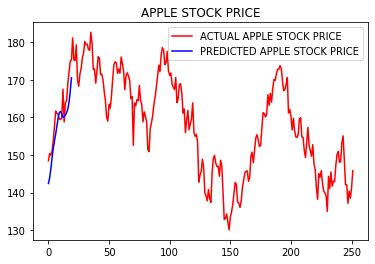

In [41]:
plt.plot(pt, color ='red',label='ACTUAL APPLE STOCK PRICE')
plt.plot(predicted_stock_price,color ='blue',label='PREDICTED APPLE STOCK PRICE')
plt.title('APPLE STOCK PRICE')
plt.legend()